# Pivoting

A pivot is a quantity whose distribution does not depend on the parameters of the p.d.f. under consideration

Consider a Gaussian distribution, $Gaus(\mu, \sigma^2)$.



In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
# First let's start with a gaussian likelihood
def pdf(data, mu, sigma):
  
    return 1./(math.sqrt(2*math.pi)*sigma)*math.exp(-((data-mu)**2/sigma**2).sum())
    #return 1./(math.sqrt(2*math.pi)*sigma)*math.exp(-1*argument)
    #return 1./(math.sqrt(2*math.pi)*sigma)*math.exp(-(data-theta)**2/sigma**2)


Let's generate some data

(array([ 10.,  24.,  70., 148., 224., 225., 177.,  85.,  30.,   7.]),
 array([-3.19574692, -2.56710137, -1.93845583, -1.30981029, -0.68116474,
        -0.0525192 ,  0.57612634,  1.20477189,  1.83341743,  2.46206297,
         3.09070852]),
 <BarContainer object of 10 artists>)

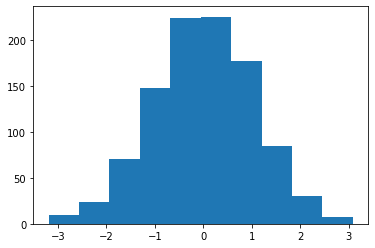

In [3]:
data=np.random.normal(0, 1, size=1000)

plt.hist(data)

Let's consider a test statistic $g(x) = \frac{1}{N} \sum x_i$ and plot its distribution for several values of $\mu$

Mu -10.0
Mean -9.999697197569084
Variance 0.000996607260343155


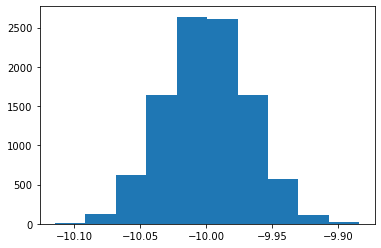

Mu -5.0
Mean -4.999668386754752
Variance 0.0009868798736029482


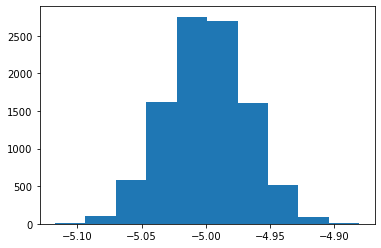

Mu 0.0
Mean -0.0004048309365239685
Variance 0.0009963272591630842


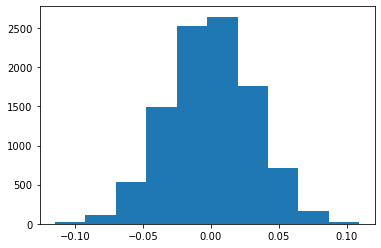

Mu 5.0
Mean 5.000103098903536
Variance 0.0010183921660468806


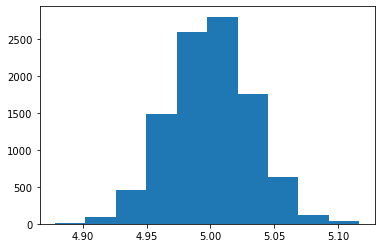

Mu 10.0
Mean 9.99985599367104
Variance 0.000998093318929044


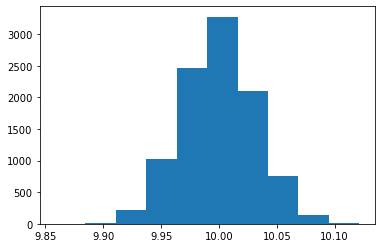

In [5]:
mu=np.linspace(-10,10,num=5)


#y = [ np.mean(np.random.normal(mu_i, 1, size=1000)) for mu_i in mu ]
np.random.seed(0)
for mu_i in mu:
    y = [ np.mean(np.random.normal(mu_i, 1, size=1000)) for _ in range(10000)]
    plt.hist(y)
    print('Mu', mu_i)
    print('Mean',np.mean(y))
    print('Variance', np.var(y))
    plt.show()

Now let's consider the pivot constituted by the Student's $t$ distribution defined as

$t = \frac{\bar{x}-mu}{var(x)/\sqrt{N}}$

In [6]:
def pivot(data, mu):
    return math.sqrt(len(data))*(np.mean(data)-mu)/np.var(data)
    
    

Now let's plot the pivot quantity as a function of the parameter mu

Mu -10.0
Mean 0.010468343822075694
Variance 1.0057828048169661


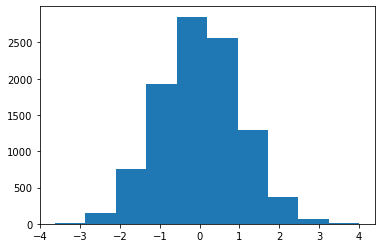

Mu -5.0
Mean 0.01097042542878095
Variance 0.9950896197696926


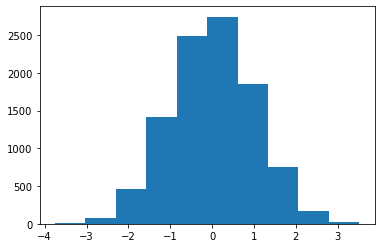

Mu 0.0
Mean -0.012264043522868355
Variance 1.0045946421294139


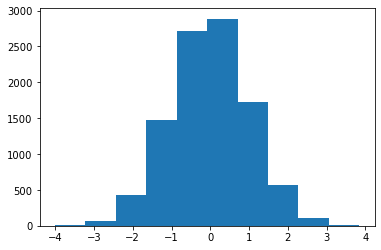

Mu 5.0
Mean 0.002711614533178052
Variance 1.0274915235084932


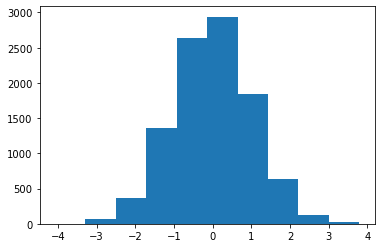

Mu 10.0
Mean -0.004377714981989071
Variance 1.0045601902161105


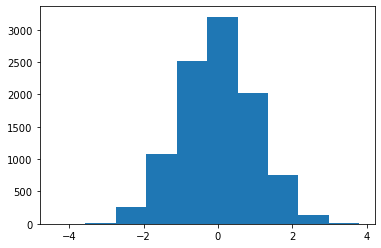

In [8]:
mu=np.linspace(-10,10,num=5)


#y = [ np.mean(np.random.normal(mu_i, 1, size=1000)) for mu_i in mu ]
np.random.seed(0)

for mu_i in mu:
    y = [ pivot(np.random.normal(mu_i, 1, size=1000), mu_i) for _ in range(10000)]
    plt.hist(y)
    print('Mu', mu_i)
    print('Mean',np.mean(y))
    print('Variance', np.var(y))
    plt.show()